In [29]:
import pulsestreamer
import pyvisa
import numpy as np
import sys
from importlib import reload
import matplotlib.pyplot as plt

directory_path = "C:\\Users\\Li_Lab_B12\\Desktop\\DataSumukh\\250731_PythonCode\\"
sys.path.append(directory_path)

import ODMR
reload(ODMR)

<module 'ODMR' from 'C:\\Users\\Li_Lab_B12\\Desktop\\DataSumukh\\250731_PythonCode\\dev\\ODMR.py'>

In [32]:
# Initialize all the instruments
pulsestreamer_ip = '192.168.0.100'
ps = pulsestreamer.PulseStreamer(pulsestreamer_ip)
ps.reset()

rm = pyvisa.ResourceManager()
sg386 = rm.open_resource('GPIB0::27::INSTR')
sg386.write('ENBR 1')

# 2. Create different experiment classes using same instruments
odmr_config = {
    'aomvolt': 0.5,
    'pulsenum': 10000,
    'count_t': 0.05*1e6,
    'separation_t': 0.03*1e6,
    'addl_t': 0.003*1e6,
    'wait_t': 0.003*1e6,
    'freq': 1.85e9,
    'mw_power': -20,
    'seqplot': True
}

odmr = ODMR.ODMR(odmr_config, ps=ps, sg386=sg386, rm=rm)



Connect to Pulse Streamer via JSON-RPC.
IP / Hostname: 192.168.0.100
Pulse Streamer 8/2 firmware: v1.7.2
Client software: v1.7.0


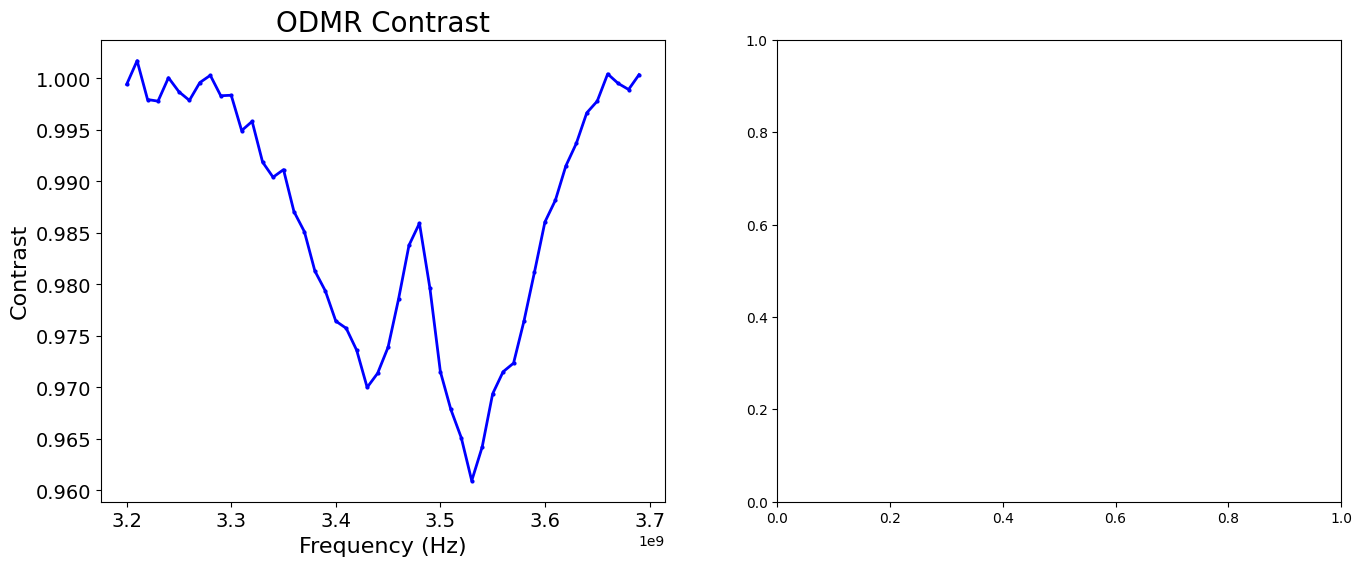

Frequency sweep: 100%|██████████| 51/51 [00:46<00:00,  1.10it/s]


In [33]:
# 3. Run ODMR experiment
freqs = np.linspace(3.2e9, 3.7e9, 51)
freq_range, contrast, mw_on, mw_off = odmr.run_frequency_sweep(freqs)

# plt.figure(1)
# plt.plot(freqs, contrast, linewidth=2)
# plt.xlabel('Frequency (Hz)',fontsize=16)
# plt.ylabel('Contrast',fontsize=16)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# 4. Reuse instruments for other experiments
# confocal_config = {...}
# confocal = Confocal(confocal_config, ps=ps, sg386=sg386)

# rabi_config = {...}
# rabi = Rabi(rabi_config, ps=ps, sg386=sg386)



In [ ]:
# 5. Close instruments when completely done
sg386.close()
rm.close()